- Reading Data
	- Pandas - to deal with datasets
	- read_format()
	- read_csv("file name")
	- read_excel()
	- df - dataframe - pandas object that was returned
	- df.head() shows the first 5 rows of the dataset



```
- import pandas as pd
- import matplotlib as plt

- df = pd.read_csv("")
- df.head()
```



- Data Statistics

- Overview
	- m rows
	- n cols
- Look into an attribute
	- Categorical
	- Numeric
	- Basics: N, min, max
	- Central Tendency: mean, median, mode, midrange
	- Dispersion: Range, Quartile, IQR, Variance, SD, Outlier (1.5*IQR)



```
- df.info()
```



- get Value count for Categories



```
df["Make"].value_counts()
```



- get Central Tendency



```
col = 'Model Year'
min = df[col].min
max = df['Model Year'].max()
median = df[col].median()
mode = df[col].mode()
midrange = (max + min)/2
print(col, min, max, median, mode, midrange)
```



- get dispersion



```
range = df["Model Year"].max() - df["Model Year"].min()
quantiles = df[col].quantile([0.25, 0.5, 0.75])
IQR = quantiles[0.75] - quantiles[0.25]
var = df[col].var()
std = df[col].std()

print(col, range, quantiles[0.25]. quantiles[0.5], quantiles[0.75], IQR, var, std)
```



- built in function



```
df.describe()

count
mean
std
min
25%
50%
75%
max
```



- Data Visualization
- Number to Charts




```
import matplotlib.pyplot as plt
plt.show()
```



- Pie chart for categorical values



```
df2 = pd.DataFrame ({"Make": df['Make].value_counts()[:10]})
df2.plot.pie(y="Make", figsize=(7,7))
```



- Central Tendency - Histogram



```
df["Model Year"].hist()
df["Model Year"].hist(bins=10)
```



- Central Tendency - Density



```
df["Electric Range"].plot.density()
```



- Dispersion - Boxplot



```
df.boxplot(column = "Electric Range")
```



- Dispersion by Categories



```
df.boxplot(column = "Electric Range", by = "Make")
plt.xticks(rotation = 90)
plt.show()
```



- Dispersion by Categories with filter



```
df[df["Make"].isin(["TESLA"])].boxplot(column="Electric Range", by="Model")
plt.xticks(rotation=90)
plt.show()
```



- identify associations

`plt.scatter(df['Model Year'], df['Electric Range'])`



---



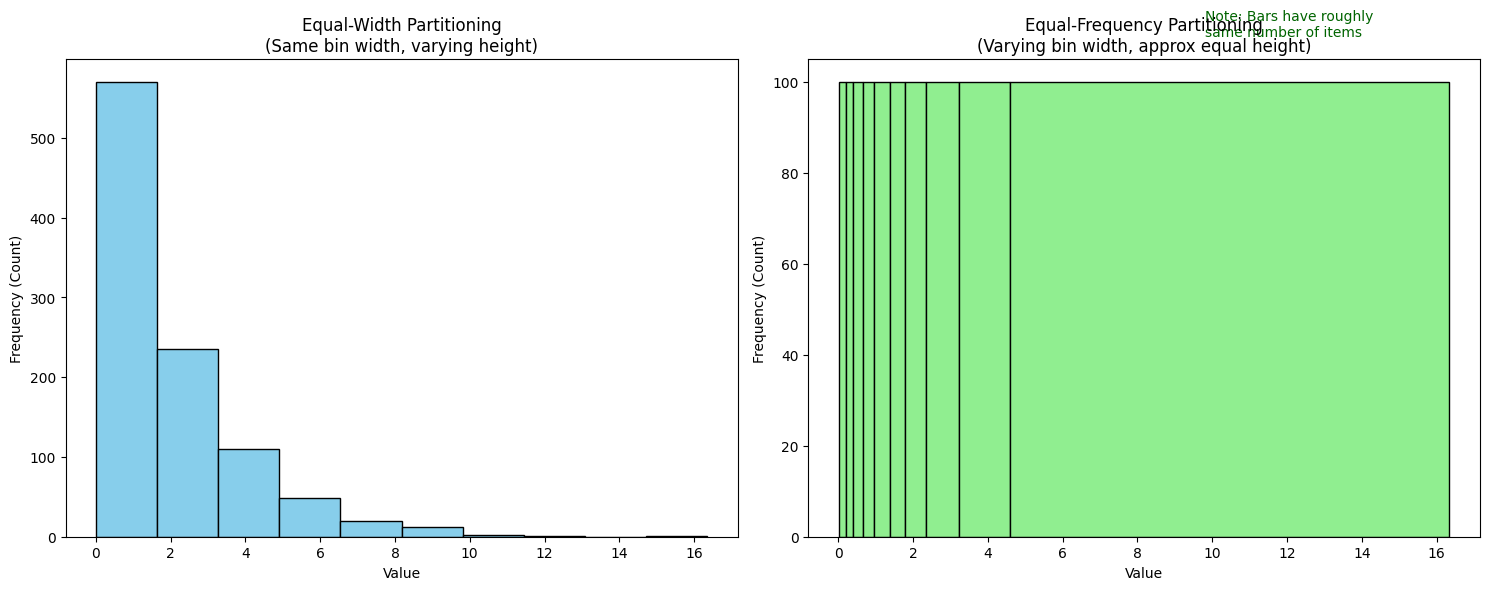

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 1. Generate synthetic skewed data (e.g., exponential distribution)
np.random.seed(42)
data = np.random.exponential(scale=2, size=1000)

# Set the number of bins
k = 10

# --- Plot 1: Equal-Width Partitioning ---
# Simply splitting the range [min, max] into k equal intervals
width_bins = np.linspace(data.min(), data.max(), k+1)

# --- Plot 2: Equal-Frequency (Equal-Depth) Partitioning ---
# Calculating quantiles so each bin has the same count (~10%)
freq_bins = np.percentile(data, np.linspace(0, 100, k+1))

# --- Visualization ---
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot Equal-Width
axes[0].hist(data, bins=width_bins, color='skyblue', edgecolor='black')
axes[0].set_title(f'Equal-Width Partitioning\n(Same bin width, varying height)')
axes[0].set_xlabel('Value')
axes[0].set_ylabel('Frequency (Count)')

# Plot Equal-Frequency
# Note: We plot the histogram using the calculated quantile bins.
# If we plot raw counts, the bars will be roughly equal height (flat).
counts, _, _ = axes[1].hist(data, bins=freq_bins, color='lightgreen', edgecolor='black')
axes[1].set_title(f'Equal-Frequency Partitioning\n(Varying bin width, approx equal height)')
axes[1].set_xlabel('Value')
axes[1].set_ylabel('Frequency (Count)')

# Add text to show that heights are similar in plot 2
axes[1].text(freq_bins[-1]*0.6, max(counts)*1.1, "Note: Bars have roughly\nsame number of items", fontsize=10, color='darkgreen')

plt.tight_layout()
plt.show()

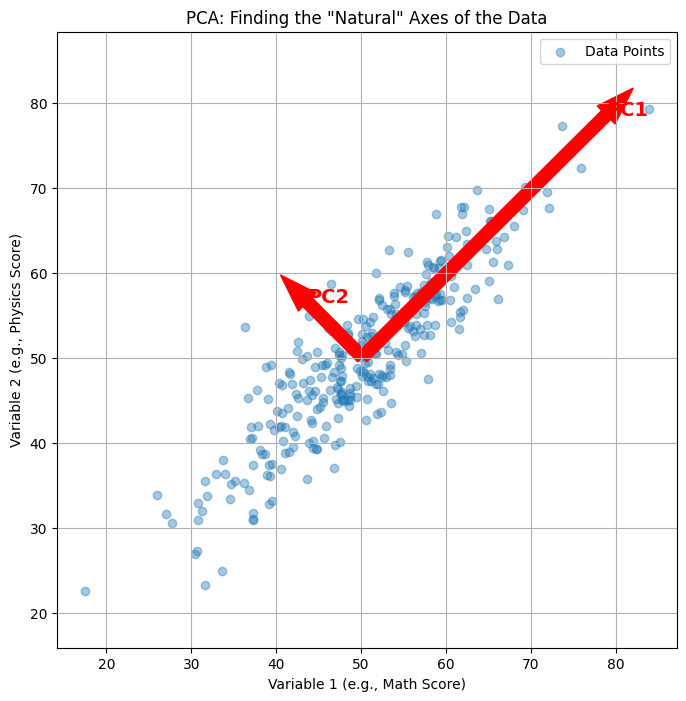

PC1 explains 95.1% of the variance.
PC2 explains 4.9% of the variance.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# 1. Generate Correlated Data (e.g., Math vs Physics scores)
np.random.seed(42)
# Mean of 50, 50
mean = [50, 50]
# Covariance matrix: high covariance (0.9) means strong correlation
cov = [[100, 90],
       [90, 100]]

data = np.random.multivariate_normal(mean, cov, 300)

# 2. Apply PCA
pca = PCA(n_components=2)
pca.fit(data)

# Get the components (eigenvectors) and variance explained (eigenvalues)
components = pca.components_
explained_variance = pca.explained_variance_

# 3. Visualization
plt.figure(figsize=(8, 8))
plt.scatter(data[:, 0], data[:, 1], alpha=0.4, label='Data Points')

# Draw the Principal Components as vectors
mean_val = np.mean(data, axis=0)
for i, (comp, var) in enumerate(zip(components, explained_variance)):
    # Scale the vector length by the square root of variance (standard deviation) for visibility
    vector_len = np.sqrt(var) * 3
    plt.arrow(mean_val[0], mean_val[1],
              comp[0] * vector_len, comp[1] * vector_len,
              color='red', width=1.5, head_width=3)
    plt.text(mean_val[0] + comp[0] * vector_len,
             mean_val[1] + comp[1] * vector_len,
             f'PC{i+1}', color='red', fontsize=14, weight='bold')

plt.title('PCA: Finding the "Natural" Axes of the Data')
plt.xlabel('Variable 1 (e.g., Math Score)')
plt.ylabel('Variable 2 (e.g., Physics Score)')
plt.axis('equal') # Important to see true orthogonality
plt.grid(True)
plt.legend()
plt.show()

# Print explained variance ratio
print(f"PC1 explains {pca.explained_variance_ratio_[0]:.1%} of the variance.")
print(f"PC2 explains {pca.explained_variance_ratio_[1]:.1%} of the variance.")

The Long Arrow (PC1): This is the Eigenvector associated with the largest Eigenvalue. It points along the main spread of the data.

The Short Arrow (PC2): This is perpendicular to PC1. It captures the remaining noise.

Dimensionality Reduction: If you ignore the short arrow (PC2), you flatten the data onto the long arrow (PC1). You lose a tiny bit of detail, but you simplify the dataset significantly.